In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
usecols = ["mid", "device", "event", "when", "amount", "revenue", "shipping_fee"]

In [4]:
tp =  pd.read_csv(r"C:\Users\b0770\Desktop\customer buy data\buy_customer_data2.csv", iterator=True, chunksize=1000)
#tp = pd.read_csv('train.csv', iterator=True, chunksize=1000)  # gives TextFileReader
df = pd.concat(tp, ignore_index=True)

In [5]:
len(df)

11129842

In [6]:
len(df.columns)

29

In [7]:
df.head()

Unnamed: 0  Unnamed: 0.1       mid session-id  login device platform event  \
0           1             1  906591.0        NaN   True  phone  android  view   
1           2             2  906591.0        NaN   True  phone  android  view   
2           4             4  735176.0        NaN   True  phone  android  view   
3           5             5  735176.0        NaN   True  phone  android  view   
4           6             6  735176.0        NaN   True  phone  android  view   

         when                 where  ...        id theme-subject gid  \
0  1613703533       index_recommend  ...  69368094           NaN NaN   
1  1613703533       index_recommend  ...  75800273           NaN NaN   
2  1613703533  item_bottom_alsolike  ...  76835375           NaN NaN   
3  1613703533  item_bottom_alsolike  ...   4853462           NaN NaN   
4  1613703533  item_bottom_alsolike  ...   4211135           NaN NaN   

  theme-style deviceType parent-category-id amount revenue shipping_fee  \
0         NaN        NaN                NaN    NaN     NaN          NaN   
1         NaN        NaN                NaN    NaN     NaN          NaN   
2         NaN        NaN                NaN    NaN     NaN          NaN   
3         NaN        NaN                NaN    NaN     NaN          NaN   
4         NaN        NaN                NaN    NaN     NaN          NaN   

  transaction_id  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 29 columns]

In [8]:
df = df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "login"], errors = "ignore")

In [9]:
df = df.drop_duplicates()

In [10]:
df = df.sort_values(by = ["when"])

In [66]:
len(set(df["mid"]))

10442

In [18]:
len(df)

11039923

In [146]:
df.describe()

mid          when    pit-number           gid        amount  \
count  1.103992e+07  1.103992e+07  1.063500e+07  7.687320e+05  32345.000000   
mean   9.586648e+05  1.613592e+09  1.541966e+04  6.459626e+07      1.015582   
std    3.182034e+05  6.952330e+05  2.707396e+05  1.289224e+05      0.220049   
min    1.586000e+03  1.612107e+09  1.000000e+00  6.255586e+07      1.000000   
25%    7.856850e+05  1.613712e+09  8.000000e+00  6.450956e+07      1.000000   
50%    1.070300e+06  1.613884e+09  3.600000e+01  6.456324e+07      1.000000   
75%    1.222266e+06  1.614071e+09  1.960000e+02  6.464500e+07      1.000000   
max    1.260325e+06  1.614254e+09  5.300770e+06  6.487909e+07     20.000000   

            revenue  shipping_fee  transaction_id  
count  14488.000000  14488.000000    1.448800e+04  
mean    2668.504625     21.941607    9.992390e+13  
std     2827.508177     57.572247    5.929439e+03  
min        0.000000      0.000000    9.992390e+13  
25%     1149.000000      0.000000    9.992390e+13  
50%     1881.500000      0.000000    9.992390e+13  
75%     3164.000000      0.000000    9.992390e+13  
max    39720.000000    900.000000    9.992390e+13

In [20]:
len(df[(df.event == "buy")])

14488

In [16]:
datetime.fromtimestamp(np.min(df.when))

datetime.datetime(2021, 1, 31, 23, 21, 52)

In [17]:
datetime.fromtimestamp(np.max(df.when))

datetime.datetime(2021, 2, 25, 19, 46, 33)

In [20]:
mid = list(set(df["mid"]))

In [13]:
mid[0]

491521.0

In [14]:
len(mid)

10442

In [15]:
df[(df.mid == mid[0]) & (df.event == "buy")]

mid session-id device platform event        when where  \
3482339  491521.0        NaN  phone  android   buy  1612283567   NaN   
1906137  491521.0        NaN  phone  android   buy  1613817201   NaN   

         pit-number  tid         type  ...       id theme-subject gid  \
3482339         NaN  NaN  user_submit  ...  4998227           NaN NaN   
1906137         NaN  NaN  user_submit  ...  5293532           NaN NaN   

        theme-style deviceType parent-category-id amount revenue  \
3482339         NaN        NaN                NaN    NaN   447.0   
1906137         NaN        NaN                NaN    1.0   554.0   

         shipping_fee transaction_id  
3482339          70.0   9.992390e+13  
1906137          70.0   9.992390e+13  

[2 rows x 26 columns]

In [16]:
buy_data = test_data[test_data.event == "buy"]

NameError: name 'test_data' is not defined

In [ ]:
data_ = buy_data

In [ ]:
df.loc[3482339, "mid"]

In [ ]:
def calculate_RFM(data_):
    data_ = data_.reset_index()
    for i in range(len(data_)):
        if i == 0:
            data_.loc[i, "count"] = 1
        else:
            data_.loc[i, "count"] = data_.loc[i-1, "count"] + 1

    for i in range(len(data_)):
        if i == 0:
            data_.loc[i, "average buy"] = data_.loc[i, "revenue"]
        else:
            data_.loc[i, "average buy"] = (data_.loc[i-1, "count"] * data_.loc[i-1, "average buy"] + data_.loc[i, "revenue"]) / data_.loc[i, "count"]

    for i in range(len(data_)):
        if i == 0:
            data_.loc[i, "T"] = 0
        else:
            data_.loc[i, "T"] = (data_.loc[i-1, "T"] * data_.loc[i-1, "count"] + (data_.loc[i,"when"] - data_.loc[i-1, "when"])) / data_.loc[i, "count"]
    
    return data_        

In [ ]:
for id_ in mid:
    buy_data = df[(df.mid == id_) & (df.event == "buy")]
    buy_data = calculate_RFM(buy_data)
    for i in range(len(buy_data["index"])):
        df.loc[buy_data.loc[i,"index"], "average buy"] = buy_data.loc[i, "average buy"]
        df.loc[buy_data.loc[i, "index"], "T"] = buy_data.loc[i, "T"]
    #print(df[(df.mid == id_) & (df.event == "buy")])
    #break

In [ ]:
df.head()

In [30]:
buy_data = df[df.event == "buy"]

In [ ]:
(buy_data).to_csv("only_buy_data_1.csv")

Implement from here

In [3]:
buy_data = pd.read_csv(r"C:\Users\b0770\Desktop\only_buy_data_1.csv")

In [4]:
buy_data.columns

Index(['Unnamed: 0', 'mid', 'session-id', 'device', 'platform', 'event',
       'when', 'where', 'pit-number', 'tid', 'type', 'path', 'generated',
       'utm-source', 'utm-medium', 'market-id', 'token', 'id', 'theme-subject',
       'gid', 'theme-style', 'deviceType', 'parent-category-id', 'amount',
       'revenue', 'shipping_fee', 'transaction_id', 'average buy', 'T'],
      dtype='object')

In [5]:
buy_customer = list(set(buy_data.mid))

In [127]:
buy_times = []
for i in range(len(buy_customer)):
    buy_times.append(len(buy_data[buy_data.mid == buy_customer[i]]))

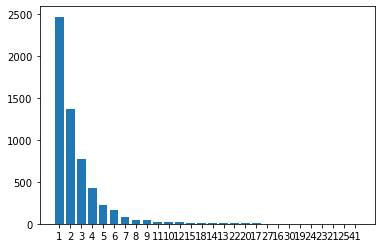

In [46]:
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

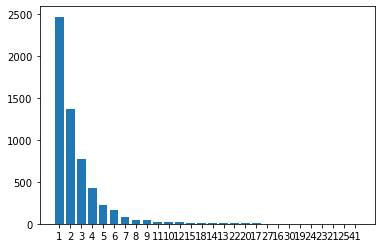

In [47]:
from collections import Counter
import collections
D = dict(Counter(buy_times))
#D = collections.OrderedDict(D)
#np.count(buy_times)
D = dict(sorted(D.items(), key=lambda x: x[1], reverse= True))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [111]:
import random

def gamma_random_sample(mean, variance, size):
    """Yields a list of random numbers following a gamma distribution defined by mean and variance"""
    g_alpha = mean*mean/variance
    g_beta = mean/variance
    for i in range(size):
        yield random.gammavariate(g_alpha,1/g_beta)

In [110]:
test_customer = buy_customer[(buy_times.index(17))]
customer =  buy_data[buy_data.mid == test_customer]
customer_buy_set = customer[customer.event == "buy"]
customer_buy_set.head()

fit = list(customer_buy_set["T"] / (1000))
while(fit[0] == 0):
    popped_element = fit.pop(0)
    
#data = [6176, 11046, 670, 6146, 7945, 6864, 767, 7623, 7212, 9040, 3213, 6302, 10044, 10195, 9386, 7230, 4602, 6282, 8619, 7903, 6318, 13294, 6990, 5515, 9157]
mean_of_distribution = np.mean(fit)
variance_of_distribution = np.var(fit)

grs = [int(i) for i in gamma_random_sample(mean_of_distribution,variance_of_distribution,100000*len(fit))]

#print("Original data: ", sorted(fit))
#print("Random sample: ", sorted(grs))

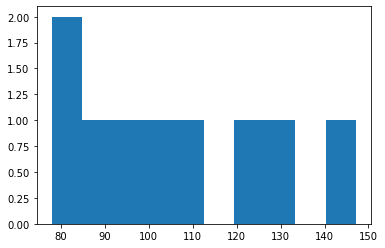

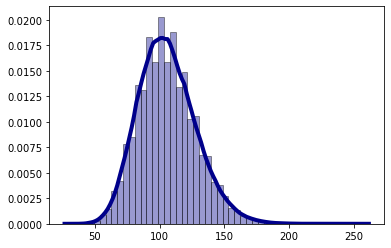

In [60]:
import seaborn as sns
plt.hist(fit)
plt.show()
'''
sns.distplot(fit, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
'''
sns.distplot(grs, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [61]:
def calculate_atc_RFM(data_):
    data_ = data_.reset_index()
    for i in range(len(data_)):
        if i == 0:
            data_.loc[i, "atc count"] = 1
        else:
            data_.loc[i, "atc count"] = data_.loc[i-1, "atc count"] + 1

    for i in range(len(data_)):
        if i == 0:
            data_.loc[i, "atc T"] = 0
        else:
            data_.loc[i, "atc T"] = (data_.loc[i-1, "atc T"] * data_.loc[i-1, "atc count"] + (data_.loc[i,"when"] - data_.loc[i-1, "when"])) / data_.loc[i, "atc count"]
    
    return data_        

In [62]:
for id_ in mid:
    atc_data = df[(df.mid == id_) & (df.event == "atc")]
    atc_data = calculate_atc_RFM(atc_data)
    for i in range(len(atc_data["index"])):
        #df.loc[buy_data.loc[i,"index"], "average buy"] = buy_data.loc[i, "average buy"]
        df.loc[atc_data.loc[i, "index"], "atc T"] = atc_data.loc[i, "atc T"]
    #print(df[(df.mid == id_) & (df.event == "buy")])
    #break

KeyboardInterrupt: 

In [ ]:
atc_data = df[df.event == "atc"]

In [ ]:
atc_customer = list(set(atc_data.mid))

In [ ]:
atc_times = []
for i in range(len(atc_customer)):
    atc_times.append(len(atc_data[atc_data.mid == atc_customer[i]]))

In [ ]:
from collections import Counter
import collections
D_atc = dict(Counter(atc_times))
#D = collections.OrderedDict(D)
#np.count(buy_times)
D_atc = dict(sorted(D_atc.items(), key=lambda x: x[1], reverse= True))
plt.bar(range(len(D_atc)), list(D_atc.values()), align='center')
plt.xticks(range(len(D_atc)), list(D_atc.keys()))
plt.show()

In [ ]:
test_customer_atc = atc_customer[(atc_times.index(17))]
customer_atc =  df[df.mid == test_customer_atc]

In [ ]:
customer_atc_set = customer_atc[customer_atc.event == "atc"]
fit = list(customer_atc_set["atc T"] / (1000))
while(fit[0] == 0):
    popped_element = fit.pop(0)

In [ ]:
#data = [6176, 11046, 670, 6146, 7945, 6864, 767, 7623, 7212, 9040, 3213, 6302, 10044, 10195, 9386, 7230, 4602, 6282, 8619, 7903, 6318, 13294, 6990, 5515, 9157]
mean_of_distribution = np.mean(fit)
variance_of_distribution = np.var(fit)

grs = [int(i) for i in gamma_random_sample(mean_of_distribution,variance_of_distribution,100000*len(fit))]

#print("Original data: ", sorted(fit))
#print("Random sample: ", sorted(grs))

In [ ]:
import seaborn as sns
plt.hist(fit)
plt.show()

sns.distplot(fit, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(grs, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
time = (df["when"])
df["time"] = pd.to_datetime(pd.Series(time), unit = "s")
df["time index"] = 60*(df["time"].dt.hour) + (df["time"].dt.minute)

In [ ]:
groupby_time = df.groupby("time index")

In [ ]:
revenue_sum = groupby_time["revenue"].sum().fillna(0)
revenue_std = groupby_time["revenue"].std().fillna(0)
revenue_mean = groupby_time["revenue"].mean().fillna(0)
revenue_max = groupby_time["revenue"].max().fillna(0)

In [ ]:
buying = df.groupby(["time index","event"]).size().reset_index()
buying = buying[buying.event == "buy"]

In [ ]:
#plt.plot(revenue_sum.keys(), revenue_sum.values, label = "sum")
#plt.plot(revenue_sum.keys(), revenue_sum.values / revenue_std.values, label = "std sum")
plt.plot(revenue_mean.keys(), revenue_mean.values,alpha = 0.5 ,label = "mean")
plt.plot(buying["time index"], 100 * buying[0], label = "buy time * 100")
#plt.plot(revenue_max.keys(), revenue_max.values, label = "max")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 1100)
plt.show()

In [ ]:
event_series = df.groupby(["time index","event"]).size()
event_frame = event_series.reset_index()

In [ ]:
def calculate_rate(data_frame, column_name):
    data_frame = data_frame.reset_index(drop = True)
    rate_list = []
    rate_list.append(0)
    temp = data_frame.loc[0,column_name]
    for i in range(1,len(data_frame)):
        rate_list.append((data_frame.loc[i, column_name] - temp) / temp)
        temp = data_frame.loc[i, column_name]
    data_frame["rate"] = rate_list
    return data_frame

In [ ]:
atc = event_frame[event_frame.event == "atc"]
plt.plot(atc["time index"], atc[0], label = "atc")
pageview = event_frame[event_frame.event == "pageview"]
plt.plot(pageview["time index"], pageview[0], label = "pageview")
click = event_frame[event_frame.event == "click"]
plt.plot(click["time index"], click[0], label = "click")
love = event_frame[event_frame.event == "love"]
plt.plot(love["time index"], love[0], label = "love")
impression = event_frame[event_frame.event == "impression"]
plt.plot(impression["time index"], impression[0], label = "impression")
buy = event_frame[event_frame.event == "buy"]
plt.plot(buy["time index"], buy[0], label = "buy")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 1100)
plt.show()

In [ ]:
def normalize(data):
    result = (data) / np.std(data)
    return result

In [ ]:
atc = event_frame[event_frame.event == "atc"]
plt.plot(atc["time index"], normalize(atc[0]), label = "atc")
pageview = event_frame[event_frame.event == "pageview"]
plt.plot(pageview["time index"], normalize(pageview[0]) , label = "pageview")
click = event_frame[event_frame.event == "click"]
plt.plot(click["time index"], normalize(click[0]), label = "click")
love = event_frame[event_frame.event == "love"]
plt.plot(love["time index"], normalize(love[0]), label = "love")
impression = event_frame[event_frame.event == "impression"]
plt.plot(impression["time index"], normalize(impression[0]), label = "impression")
buy = event_frame[event_frame.event == "buy"]
plt.plot(buy["time index"], normalize(buy[0]), label = "50*buy")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 1100)
plt.show()

In [ ]:
event_times = pd.DataFrame(event_series.unstack(level=1))
event_times = event_times.fillna(0)

In [ ]:
event_times["atc"] = atc[0]
event_times["pageview"] = pageview[0]
event_times["click"] = click[0]
event_times["buy"] = buy[0]

In [ ]:
event_times = event_times.fillna(0)
event_times.corr()

In [ ]:
def calculate_rate(data_frame, column_name):
    data_frame = data_frame.reset_index(drop = True)
    rate_list = []
    rate_list.append(0)
    temp = data_frame.loc[0,column_name]
    for i in range(1,len(data_frame)):
        rate_list.append((data_frame.loc[i, column_name] - temp) / temp)
        temp = data_frame.loc[i, column_name]
    data_frame["rate"] = rate_list
    return data_frame

In [ ]:
atc = calculate_rate(atc, 0)
pageview = calculate_rate(pageview, 0)
click = calculate_rate(click, 0)
click["rate_page_view"] = pageview["rate"]
click["rate_atc"] = atc["rate"]
click = click.fillna(0)

In [ ]:
click.drop(columns = [0, "time index"]).corr()

In [ ]:
temp_click = click.drop(columns = [0, "time index"])
temp_click["rate_page_view"] = temp_click["rate_page_view"].shift(-1)
temp_click.corr()
#df['gdp'] = df['gdp'].shift(-1)
#type(temp_click.squeeze())

In [ ]:
plt.plot(atc["time index"], atc["rate"],alpha = 1 ,label = "atc")
plt.plot(pageview["time index"], pageview["rate"],alpha = 0.7 ,label = "pageview")
plt.plot(click["time index"], click["rate"],alpha = 0.5, label = "click")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim([0, 1200])
plt.show()

In [ ]:
where_event_rel = df.groupby(["where", "event"]).size()
where_event_rel.unstack(level=1).plot(kind='bar', subplots=False)

column care about
* mid
* device
* event count
* when(T)
* avg amount
* total amount
* average buy
* total buy
* average shipping fee
* atc T

In [67]:
mid_list = list(df.groupby("mid").size().index)

In [68]:
def calculate_classify(data):
    count_view = 0
    count_click = 0
    count_pageview = 0
    count_love = 0
    count_computer = 0
    count_phone = 0
    count_tablet = 0
    total_buy = 0
    average_shipping_fee = 0
    atc_T = 0
    buy_T = 0
    average_amount = 0
    total_amount = 0
    total_buy = 0
    total_atc = 0
    data = data.reset_index()
    for i in range(len(data)):
        if data.loc[i, "device"] == "computer":
            count_computer = count_computer + 1
        elif data.loc[i,"device"] == "phone":
            count_phone = count_phone + 1
        elif "tablet":
            count_tablet = count_tablet + 1
                
        if data.loc[i, "event"] == "view":
            count_view = count_view + 1
        elif data.loc[i, "event"] == "click":
            count_click = count_click + 1
        elif data.loc[i, "event"] == "pageview":
            count_pageview = count_pageview + 1
        elif data.loc[i, "event"] ==  "love":
            count_love = count_love + 1
        elif data.loc[i, "event"] == "atc":
            if total_atc == 0:
                atc_T = 0
                prev_atc = i
                total_atc = total_atc + 1
            else:
                atc_T = (atc_T * total_atc + (data.loc[i,"when"]- data.loc[prev_atc, "when"])) / (total_atc+1)
                total_atc = total_atc + 1
        elif data.loc[i, "event"] == "buy":
            if total_buy == 0:
                prev_buy = i
                average_amount = data.loc[i, "amount"]
                total_amount = data.loc[i, "amount"]
                buy_T = 0
                average_shipping_fee = data.loc[i, "shipping_fee"]
                total_buy = total_buy + 1
            else:
                average_amount  = (average_amount * total_buy + data.loc[i,"amount"]) / (average_amount + 1)
                total_amount = total_amount + data.loc[i, "amount"]
                buy_T = (buy_T * total_buy + (data.loc[i, "when"] - data.loc[prev_buy, "when"])) / (total_buy + 1)
                average_shipping_fee = (average_shipping_fee*total_buy + data.loc[i, "shipping_fee"]) / (total_buy+1)
            
            data.loc[i, "average_amount"] = average_amount
            data.loc[i, "total_amount"] = total_amount
            data.loc[i, "buy_T"] = buy_T
            data.loc[i, "average_shipping_fee"] = average_shipping_fee
            data.loc[i, "atc_T"] = atc_T
            data.loc[i, "count_view"] = count_view
            data.loc[i, "count_click"] = count_click
            data.loc[i, "count_pageview"] = count_pageview
            data.loc[i, "count_love"] = count_love
            count_view = 0
            count_click = 0
            count_pageview = 0
            count_love = 0
    return  data[data.event == "buy"].reset_index(drop = True)

In [69]:
df[df.mid == mid[0]].head()

mid session-id device platform     event        when  \
3470325  491521.0        NaN  phone  android  pageview  1612282955   
3470350  491521.0        NaN  phone  android      view  1612282957   
3470351  491521.0        NaN  phone  android      view  1612282957   
3470349  491521.0        NaN  phone  android      view  1612282957   
3470352  491521.0        NaN  phone  android      view  1612282957   

                  where  pit-number  tid         type  ...       id  \
3470325       item_page         NaN  NaN  user_submit  ...  5221388   
3470350  index_category         2.0  NaN          NaN  ...      NaN   
3470351  index_category         3.0  NaN          NaN  ...      NaN   
3470349  index_category         1.0  NaN          NaN  ...      NaN   
3470352  index_category         4.0  NaN          NaN  ...      NaN   

        theme-subject gid theme-style deviceType parent-category-id amount  \
3470325           NaN NaN         NaN        NaN                NaN    NaN   
3470350           NaN NaN         NaN        NaN                  2    NaN   
3470351           NaN NaN         NaN        NaN                  3    NaN   
3470349           NaN NaN         NaN        NaN                  1    NaN   
3470352           NaN NaN         NaN        NaN                  4    NaN   

        revenue  shipping_fee transaction_id  
3470325     NaN           NaN            NaN  
3470350     NaN           NaN            NaN  
3470351     NaN           NaN            NaN  
3470349     NaN           NaN            NaN  
3470352     NaN           NaN            NaN  

[5 rows x 26 columns]

In [70]:
df.head()

mid session-id device platform     event        when  \
3440418  860248.0        NaN  phone      ios  pageview  1612106512   
3440425  860248.0        NaN  phone      ios      view  1612106513   
3440427  860248.0        NaN  phone      ios      view  1612106513   
3440428  860248.0        NaN  phone      ios      view  1612106513   
3440426  860248.0        NaN  phone      ios      view  1612106513   

                  where  pit-number  tid         type  ...       id  \
3440418       item_page         NaN  NaN  user_submit  ...  5028168   
3440425  index_category         5.0  NaN          NaN  ...      NaN   
3440427  index_category         7.0  NaN          NaN  ...      NaN   
3440428  index_category         8.0  NaN          NaN  ...      NaN   
3440426  index_category         6.0  NaN          NaN  ...      NaN   

        theme-subject gid theme-style deviceType parent-category-id amount  \
3440418           NaN NaN         NaN        NaN                NaN    NaN   
3440425           NaN NaN         NaN        NaN                  5    NaN   
3440427           NaN NaN         NaN        NaN                  8    NaN   
3440428           NaN NaN         NaN        NaN                  6    NaN   
3440426           NaN NaN         NaN        NaN                  7    NaN   

        revenue  shipping_fee transaction_id  
3440418     NaN           NaN            NaN  
3440425     NaN           NaN            NaN  
3440427     NaN           NaN            NaN  
3440428     NaN           NaN            NaN  
3440426     NaN           NaN            NaN  

[5 rows x 26 columns]

In [71]:
classify_frame = pd.DataFrame()

for i in range(len(mid)):
    if i % 1000 == 0:
        print(i/len(mid))
    #calculate_classify(df[df.mid == mid[i]])
    classify_frame = classify_frame.append(calculate_classify(df[df.mid == mid[i]]))
classify_frame.head()

0.0
0.0957670944263551
0.1915341888527102
0.2873012832790653
0.3830683777054204
0.4788354721317755
0.5746025665581306
0.6703696609844857
0.7661367554108408
0.8619038498371959
0.957670944263551


index        mid   session-id device platform event        when where  \
0  3482339   491521.0          NaN  phone  android   buy  1612283567   NaN   
1  1906137   491521.0          NaN  phone  android   buy  1613817201   NaN   
0  8687571  1146886.0          NaN  phone  android   buy  1612351418   NaN   
0  5433006   294922.0  2.02629e+09  phone     mweb   buy  1614010660   NaN   
0  7032280   622606.0          NaN  phone  android   buy  1614128884   NaN   

   pit-number  tid  ... transaction_id average_amount total_amount     buy_T  \
0         NaN  NaN  ...   9.992390e+13            NaN          NaN       0.0   
1         NaN  NaN  ...   9.992390e+13            NaN          NaN  766817.0   
0         NaN  NaN  ...   9.992390e+13            NaN          NaN       0.0   
0         NaN  NaN  ...   9.992390e+13            1.0          1.0       0.0   
0         NaN  NaN  ...   9.992390e+13            1.0          1.0       0.0   

  average_shipping_fee          atc_T count_view count_click count_pageview  \
0                 70.0     175.000000       97.0         6.0            8.0   
1                 70.0  773256.666667      255.0        11.0           14.0   
0                 70.0    3320.666667      751.0         4.0            5.0   
0                  0.0       0.000000        3.0         0.0            1.0   
0                  0.0  256997.153846      439.0        23.0           30.0   

   count_love  
0         0.0  
1         0.0  
0         0.0  
0         0.0  
0         0.0  

[5 rows x 36 columns]

In [72]:
classify_data = classify_frame.drop(columns = ["type","where","deviceType","parent-category-id","theme-style","theme-subject","gid","id","token","utm-medium","market-id","utm-source","generated","transaction_id","index", "session-id", "event", "pit-number", "tid", "path"])

In [73]:
classify_data = classify_data.fillna(0)
classify_data = classify_data.sort_values(by = "when")

In [74]:
classify_data = classify_data.drop(columns = "when")

In [75]:
classify_data.columns

Index(['mid', 'device', 'platform', 'amount', 'revenue', 'shipping_fee',
       'average_amount', 'total_amount', 'buy_T', 'average_shipping_fee',
       'atc_T', 'count_view', 'count_click', 'count_pageview', 'count_love'],
      dtype='object')

In [76]:
#non_dummy_cols = ['amount','revenue','shipping_fee', "average_amount", ""] 
#dummy_cols = list(set(df.columns) - set(non_dummy_cols))
dummy_cols = ["device", "platform"]
classify_data = pd.get_dummies(classify_data, columns=dummy_cols)

In [77]:
with_mid_classify_data = classify_data
classify_data = classify_data.drop(columns = ["mid"])

In [78]:
classify_data.head()

amount  revenue  shipping_fee  average_amount  total_amount  buy_T  \
0     1.0   1590.0           0.0             1.0           1.0    0.0   
1     1.0   1590.0           0.0             1.0           2.0    0.0   
0     1.0    402.0          80.0             1.0           1.0    0.0   
1     1.0   1247.0          70.0             1.0           2.0    0.0   
0     1.0   1247.0          70.0             1.0           1.0    0.0   

   average_shipping_fee   atc_T  count_view  count_click  count_pageview  \
0                   0.0    0.00         0.0          0.0             0.0   
1                   0.0    0.00         0.0          0.0             0.0   
0                  80.0    0.00         0.0          0.0             0.0   
1                  70.0  217.75         0.0          0.0             0.0   
0                  70.0  217.75       126.0         15.0            17.0   

   count_love  device_computer  device_phone  device_tablet  platform_android  \
0         0.0                0             1              0                 0   
1         0.0                0             1              0                 0   
0         0.0                0             1              0                 0   
1         0.0                0             1              0                 0   
0         0.0                0             1              0                 0   

   platform_ios  platform_mweb  platform_web  
0             0              1             0  
1             0              1             0  
0             0              1             0  
1             0              1             0  
0             0              1             0

In [79]:
classify_data = classify_data.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"], errors = "ignore")

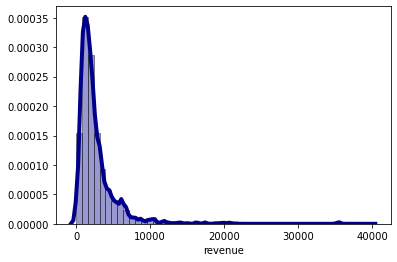

In [80]:
import seaborn as sns

sns.distplot(classify_data["revenue"], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


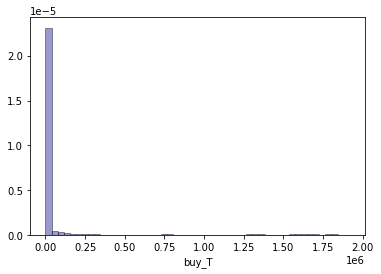

In [81]:
import seaborn as sns

sns.distplot(classify_data["buy_T"], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


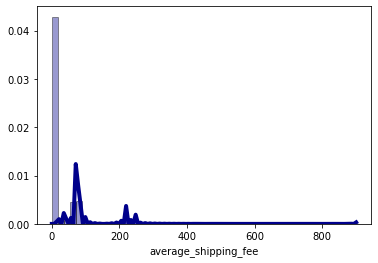

In [82]:
import seaborn as sns

sns.distplot(classify_data["average_shipping_fee"], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


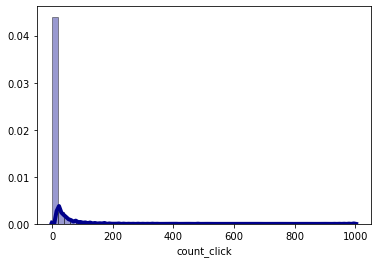

In [83]:
import seaborn as sns

sns.distplot(classify_data["count_click"], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


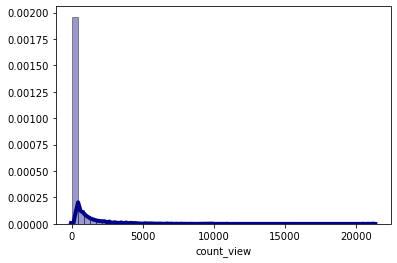

In [84]:
import seaborn as sns

sns.distplot(classify_data["count_view"], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [85]:
from sklearn.cluster import KMeans

In [86]:
class_data_numpy = classify_data.to_numpy()

In [87]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(class_data_numpy)

In [88]:
kmeans

KMeans(n_clusters=4, random_state=0)

In [48]:
from river import cluster
from river import stream

AttributeError: 'STREAMKMeans' object has no attribute 'predict'

In [308]:
x_1 = []
x_2 = []
for i in  range(len(dict_list_X)):
    x_1.append(dict_list_X[i][7])
    x_2.append(dict_list_X[i][19])

In [390]:
np.shape([[2,3],[2,3,4]])

(2,)

In [477]:
streamkmeans = cluster.STREAMKMeans(chunk_size=3, n_clusters=4, halflife=0.5, sigma=1.5, seed=0)
dict_list_X = []
y_pred_ = []
x_list = []
in_count = 0
count = 0
for x, _ in stream.iter_array(class_data_numpy):
    count = count + 1
    streamkmeans = streamkmeans.learn_one(x)
    dict_list_X.append(x)
    #print(count)
    if (count % 100== 0) and (count !=0):
        #in_count = in_count + 1
        #print(len(dict_list_X))
        temp = []
        temp_ = []
        for i in range(len(dict_list_X)):
            #print(streamkmeans.predict_one(dict_list_X[i]))
            #print("\\\\\\\\\\\/")
            #print(i)
            temp.append(streamkmeans.predict_one(dict_list_X[i]))
            temp_.append(dict_list_X[i])
            #y_pred_[in_count].append(streamkmeans.predict_one(dict_list_X[i]))
        #print(len(y_pred_[in_count]), end = " ")
        x_list.append(temp_)
        y_pred_.append(temp)
        in_count = in_count + 1
        #print(in_count, end = " ")
    #print(x)
    #print(streamkmeans.predict_one(x))

In [478]:
def get_dict_list(dict_list, column):
    list_ = []
    for i in range(len(dict_list)):
        list_.append(dict_list[i][column])
    return list_

<IPython.core.display.Javascript object>


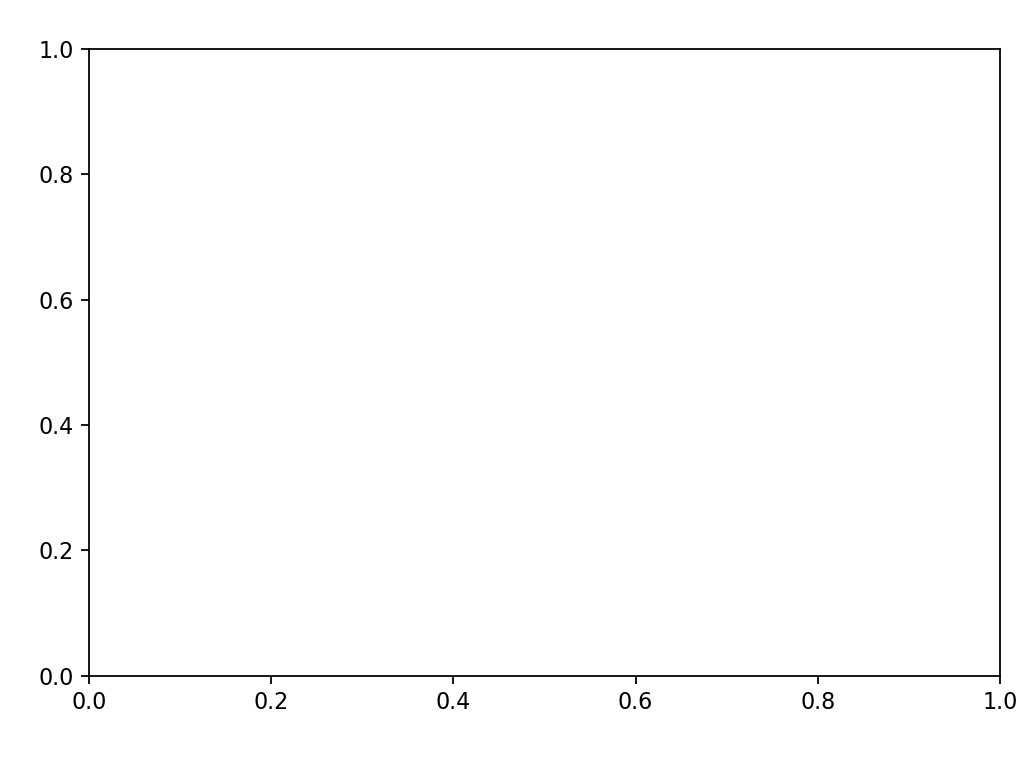

[0.0, 0.0, 0.0, 217.75, 217.75, 0.0, 0.0, 0.0, 148.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 43.2, 43.2, 43.2, 43.2, 43.2, 0.0, 882.2, 882.2, 1160.5, 1160.5, 1160.5, 1160.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 129.66666666666666, 129.66666666666666, 129.66666666666666, 455.0, 455.0, 8.0, 8.0, 8.0, 8.0, 451.8888888888889, 451.8888888888889, 451.8888888888889, 0.0, 0.0, 81.0, 0.0, 1265.75, 1265.75, 67.0, 67.0, 67.0, 67.0, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 2114.8333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.0, 23.0, 23.0]
[0.0, 0.0, 0.0, 217.75, 217.75, 0.0, 0.0, 0.0, 148.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 43.2, 43.2, 43.2, 43.2, 43.2, 0.0, 882

In [487]:
%matplotlib notebook

def animate(i):
    #x_1 = []
    #x_2 = []
    plt.cla()
    x_2 = get_dict_list(x_list[i], 6)
    x_1 = get_dict_list(x_list[i], 19)
    print(x_1)
    plt.scatter(x_1, x_2, c = y_pred_[i], s = 50, cmap = "viridis")
    plt.tight_layout()

anim = animation.FuncAnimation(plt.gcf(), animate,interval=100)
anim.save('cluster.gif', writer='pillow')
plt.show()

In [89]:
kmeans.fit(class_data_numpy)
y_kmeans = kmeans.predict(class_data_numpy)

In [90]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
classify_data.head()

amount  revenue  shipping_fee  average_amount  total_amount  buy_T  \
0     1.0   1590.0           0.0             1.0           1.0    0.0   
1     1.0   1590.0           0.0             1.0           2.0    0.0   
0     1.0    402.0          80.0             1.0           1.0    0.0   
1     1.0   1247.0          70.0             1.0           2.0    0.0   
0     1.0   1247.0          70.0             1.0           1.0    0.0   

   average_shipping_fee   atc_T  count_view  count_click  count_pageview  \
0                   0.0    0.00         0.0          0.0             0.0   
1                   0.0    0.00         0.0          0.0             0.0   
0                  80.0    0.00         0.0          0.0             0.0   
1                  70.0  217.75         0.0          0.0             0.0   
0                  70.0  217.75       126.0         15.0            17.0   

   count_love  device_computer  device_phone  device_tablet  platform_android  \
0         0.0                0             1              0                 0   
1         0.0                0             1              0                 0   
0         0.0                0             1              0                 0   
1         0.0                0             1              0                 0   
0         0.0                0             1              0                 0   

   platform_ios  platform_mweb  platform_web  
0             0              1             0  
1             0              1             0  
0             0              1             0  
1             0              1             0  
0             0              1             0

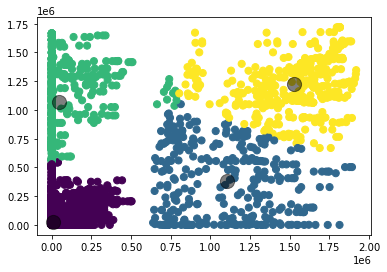

In [95]:
%matplotlib inline

plt.scatter(class_data_numpy[:, 5], class_data_numpy[:, 7], c=y_kmeans, s=50, cmap='viridis')
# 5: total amount, -1: T
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 5], centers[:, 7], c='black', s=200, alpha=0.5);
plt.show()

In [96]:
classify_data.head()

amount  revenue  shipping_fee  average_amount  total_amount  buy_T  \
0     1.0   1590.0           0.0             1.0           1.0    0.0   
1     1.0   1590.0           0.0             1.0           2.0    0.0   
0     1.0    402.0          80.0             1.0           1.0    0.0   
1     1.0   1247.0          70.0             1.0           2.0    0.0   
0     1.0   1247.0          70.0             1.0           1.0    0.0   

   average_shipping_fee   atc_T  count_view  count_click  count_pageview  \
0                   0.0    0.00         0.0          0.0             0.0   
1                   0.0    0.00         0.0          0.0             0.0   
0                  80.0    0.00         0.0          0.0             0.0   
1                  70.0  217.75         0.0          0.0             0.0   
0                  70.0  217.75       126.0         15.0            17.0   

   count_love  device_computer  device_phone  device_tablet  platform_android  \
0         0.0                0             1              0                 0   
1         0.0                0             1              0                 0   
0         0.0                0             1              0                 0   
1         0.0                0             1              0                 0   
0         0.0                0             1              0                 0   

   platform_ios  platform_mweb  platform_web  
0             0              1             0  
1             0              1             0  
0             0              1             0  
1             0              1             0  
0             0              1             0

In [98]:
classify_data["category"] = y_kmeans
#classify_data["atc_T"] = atc_T_rem

In [99]:
classify_data.groupby("category").size()

category
0    12930
1      314
2      854
3      390
dtype: int64

In [93]:
group_0 = classify_data[(classify_data.category == 0) & (classify_data.atc_T !=0)]
group_1 = classify_data[classify_data.category == 1]
group_2 = classify_data[classify_data.category == 2]
group_3 = classify_data[classify_data.category == 3]

In [94]:
print(group_0.buy_T.mean())
print(group_0.atc_T.mean())

15374.560267189556
42254.941066600106


In [95]:
print(group_1.buy_T.mean())
print(group_1.atc_T.mean())

1106666.1411543712
383125.25553374225


In [96]:
print(group_2.buy_T.mean())
print(group_2.atc_T.mean())

45244.00411422694
1066957.8640959237


In [97]:
print(group_3.buy_T.mean())
print(group_3.atc_T.mean())

1527908.0688355162
1221960.167246084


In [98]:
import random

def gamma_random_sample(mean, variance, size):
    """Yields a list of random numbers following a gamma distribution defined by mean and variance"""
    g_alpha = mean*mean/variance
    g_beta = mean/variance
    for i in range(size):
        yield random.gammavariate(g_alpha,1/g_beta)

In [99]:
#data = [6176, 11046, 670, 6146, 7945, 6864, 767, 7623, 7212, 9040, 3213, 6302, 10044, 10195, 9386, 7230, 4602, 6282, 8619, 7903, 6318, 13294, 6990, 5515, 9157]
def generate_gamma(fit):
    mean_of_distribution = np.mean(fit)
    variance_of_distribution = np.var(fit)

    grs = [int(i) for i in gamma_random_sample(mean_of_distribution,variance_of_distribution,10*len(fit))]

    #print("Original data: ", sorted(fit))
    #print("Random sample: ", sorted(grs))
    import seaborn as sns
    plt.hist(fit)
    plt.show()

    sns.distplot(fit, hist=True, kde=True, 
                  color = 'green', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})

    sns.distplot(grs, hist=True, kde=True, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})

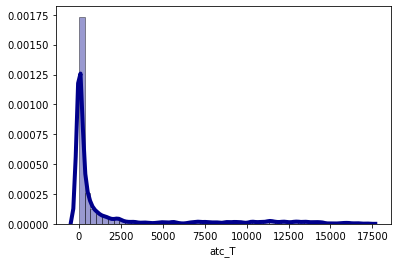

In [102]:
import seaborn as sns
no_0_classify_data = classify_data[classify_data.atc_T != 0]
sns.distplot(no_0_classify_data["atc_T"] / 100, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

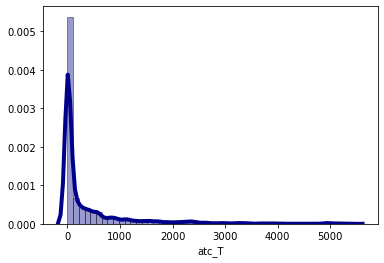

In [103]:
sns.distplot(group_0["atc_T"] / 100, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

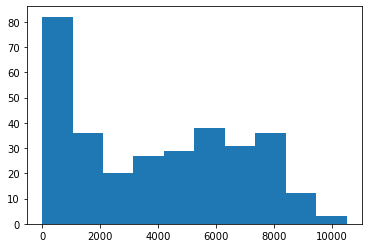

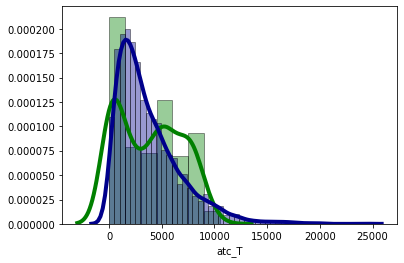

In [104]:
generate_gamma(group_1["atc_T"] / 100)

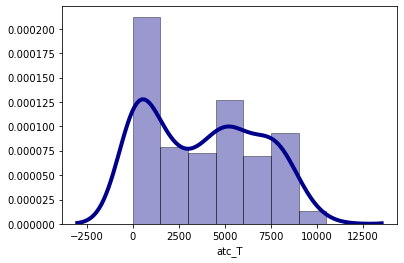

In [105]:
sns.distplot(group_1["atc_T"] / 100, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

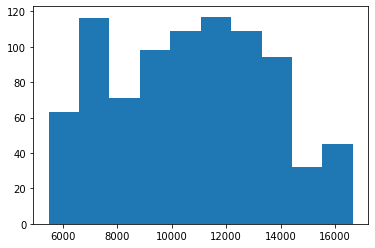

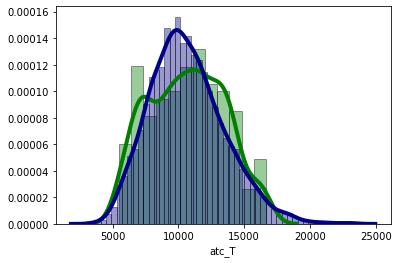

In [106]:
generate_gamma(group_2["atc_T"] / 100)

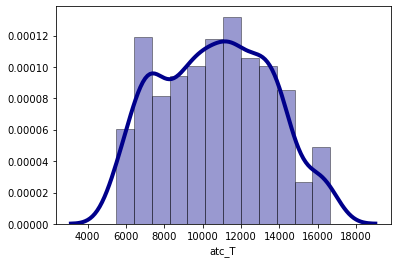

In [107]:
sns.distplot(group_2["atc_T"] / 100, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

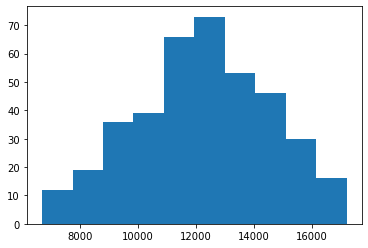

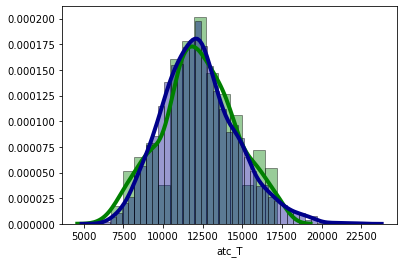

In [108]:
generate_gamma(group_3["atc_T"] / 100)

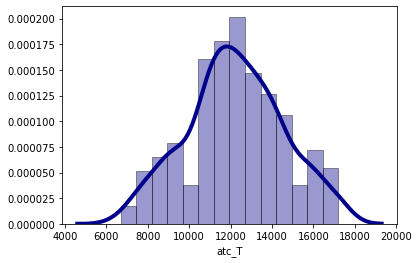

In [109]:
sns.distplot(group_3["atc_T"] / 100, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [146]:
personal_data = classify_frame.drop(columns = ["type","where","deviceType","parent-category-id","theme-style","theme-subject","gid","id","token","utm-medium","market-id","utm-source","generated","transaction_id","index", "session-id", "event", "pit-number", "tid", "path"])

In [143]:
test_customer = buy_customer[(buy_times.index(13))]

In [144]:
personal_data = with_mid_classify_data[with_mid_classify_data.mid == test_customer]
personal_data = personal_data.drop(columns = ["mid"], errors = "ignore")
#personal_data = pd.get_dummies(personal_data, columns=dummy_cols)
#personal_data = personal_data.fillna(0)

In [145]:
personal_data

amount  revenue  shipping_fee  average_amount  total_amount         buy_T  \
0      0.0    957.0          80.0             0.0           0.0  0.000000e+00   
1      0.0    750.0          70.0             0.0           0.0  6.535000e+02   
2      1.0    785.0          70.0             0.0           0.0  7.161158e+05   
3      1.0    785.0          70.0             0.0           0.0  1.073872e+06   
5      1.0   1723.0           0.0             0.0           0.0  1.705792e+06   
4      1.0   1723.0           0.0             0.0           0.0  1.495152e+06   
7      1.0   1723.0           0.0             0.0           0.0  1.863924e+06   
6      1.0   1723.0           0.0             0.0           0.0  1.811213e+06   
8      1.0    785.0          70.0             0.0           0.0  1.890523e+06   
9      1.0    900.0          70.0             0.0           0.0  1.904672e+06   
10     1.0    993.0          70.0             0.0           0.0  1.912658e+06   
11     1.0    993.0          70.0             0.0           0.0  1.916712e+06   
12     1.0   1023.0          70.0             0.0           0.0  1.918772e+06   

    average_shipping_fee         atc_T  count_view  count_click  \
0              80.000000  0.000000e+00        11.0          0.0   
1              75.000000  6.876000e+02       308.0          8.0   
2              72.500000  2.392067e+05        11.0          0.0   
3              71.250000  2.392067e+05         0.0          0.0   
5              17.812500  9.820226e+05         0.0          0.0   
4              35.625000  9.820226e+05       454.0          7.0   
7               4.453125  1.125832e+06         0.0          0.0   
6               8.906250  1.125832e+06       157.0          5.0   
8              37.226562  1.182368e+06        11.0          0.0   
9              53.613281  1.231478e+06       136.0          2.0   
10             61.806641  1.274565e+06       540.0          1.0   
11             65.903320  1.312590e+06        23.0          2.0   
12             67.951660  1.346393e+06         6.0          1.0   

    count_pageview  count_love  device_computer  device_phone  device_tablet  \
0              1.0         0.0                0             1              0   
1             15.0         0.0                0             1              0   
2              5.0         0.0                0             1              0   
3              0.0         0.0                0             1              0   
5              0.0         0.0                0             1              0   
4             11.0         0.0                0             1              0   
7              0.0         0.0                0             1              0   
6              4.0         0.0                0             1              0   
8              1.0         0.0                0             1              0   
9              1.0         0.0                0             1              0   
10             1.0         0.0                0             1              0   
11             2.0         0.0                0             1              0   
12             1.0         0.0                0             1              0   

    platform_android  platform_ios  platform_mweb  platform_web  
0                  1             0              0             0  
1                  1             0              0             0  
2                  1             0              0             0  
3                  1             0              0             0  
5                  1             0              0             0  
4                  1             0              0             0  
7                  1             0              0             0  
6                  1             0              0             0  
8                  1             0              0             0  
9                  1             0              0             0  
10                 1             0              0             0  
11               

In [146]:
def baysian_generate_gamma(fit_group, fit_personal):
    mean_of_distribution_group = np.mean(fit_group)
    variance_of_distribution_group = np.var(fit_group)
    mean_of_distribution_personal = np.mean(fit_personal)
    variance_of_distribution_personal = np.var(fit_personal)
    
    ratio = np.sqrt(variance_of_distribution_group) / (np.sqrt(variance_of_distribution_group) + np.sqrt(variance_of_distribution_personal))
    new_mean = mean_of_distribution_group*(1-ratio) + mean_of_distribution_personal * ratio
       
    grs_group = [int(i) for i in gamma_random_sample(mean_of_distribution_group,variance_of_distribution_group,10*len(fit_group))]
    grs_personal = [int(i) for i in gamma_random_sample(mean_of_distribution_personal,variance_of_distribution_personal,10*len(fit_group))]
    new_variance = (1-ratio)*(1-ratio) *variance_of_distribution_group + ratio*ratio*variance_of_distribution_personal -2*ratio*(1-ratio) \
             * np.cov(grs_group, grs_personal)[0,1]
    grs_new = [int(i) for i in gamma_random_sample(new_mean,new_variance,10*len(fit_group))]
    #print("Original data: ", sorted(fit))
    #print("Random sample: ", sorted(grs))
    print(np.cov(grs_group, grs_personal)[0,1])
    import seaborn as sns

    sns.distplot(grs_group, hist=True, kde=True, 
                  color = 'green', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})

    sns.distplot(grs_personal, hist=True, kde=True, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    
    
    sns.distplot(grs_new, hist=True, kde=True, 
                 color = 'yellow', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    '''
    for i in range(len(grs_group)):
        grs_group[i] = grs_group[i] * (1-ratio)
        grs_personal[i] = grs_personal[i] * (ratio)
    
    sns.distplot(grs_personal+grs_group, hist=True, kde=True, 
                 color = 'red', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    '''

In [147]:
%matplotlib inline

if kmeans.predict(personal_data.to_numpy())[-1] == 1:
    print("group 1")
    baysian_generate_gamma(group_1["atc_T"], personal_data["atc_T"])
elif kmeans.predict(personal_data.to_numpy())[-1] == 0:
    print("group 0")
    baysian_generate_gamma(group_0["atc_T"], personal_data["atc_T"])
elif kmeans.predict(personal_data.to_numpy())[-1] == 2:
    print("group 2")
    baysian_generate_gamma(group_2["atc_T"], personal_data["atc_T"])
else:
    print("group 3")
    baysian_generate_gamma(group_3["atc_T"], personal_data["atc_T"])

group 3


NameError: name 'group_3' is not defined

In [242]:
len(set(classify_frame["market-id"]))

10570

In [267]:
len(set(classify_frame["theme-style"].fillna(0)))

1

In [243]:
classify_frame.columns

Index(['index', 'mid', 'session-id', 'device', 'platform', 'event', 'when',
       'where', 'pit-number', 'tid', 'type', 'path', 'generated', 'utm-source',
       'utm-medium', 'market-id', 'token', 'id', 'theme-subject', 'gid',
       'theme-style', 'deviceType', 'parent-category-id', 'amount', 'revenue',
       'shipping_fee', 'transaction_id', 'atc T', 'average_amount',
       'total_amount', 'buy_T', 'average_shipping_fee', 'atc_T', 'count_view',
       'count_click', 'count_pageview', 'count_love'],
      dtype='object')

In [7]:
buy_data.head()

Unnamed: 0        mid          session-id device platform event  \
0     3320816  1248359.0  1252882688.1573553  phone     mweb   buy   
1     3320817  1248359.0  1252882688.1573553  phone     mweb   buy   
2     3331557  1107731.0   642861480.1592126  phone     mweb   buy   
3     3341671  1053436.0   1957005345.158812  phone     mweb   buy   
4     3341672  1053436.0   1957005345.158812  phone     mweb   buy   

         when  where  pit-number  tid  ...         gid theme-style  \
0  1612276814    NaN         NaN  NaN  ...         NaN         NaN   
1  1612276814    NaN         NaN  NaN  ...         NaN         NaN   
2  1612277273    NaN         NaN  NaN  ...         NaN         NaN   
3  1612277645    NaN         NaN  NaN  ...  64510735.0         NaN   
4  1612277645    NaN         NaN  NaN  ...  64510735.0         NaN   

   deviceType parent-category-id amount revenue shipping_fee  transaction_id  \
0         NaN                NaN    1.0  1590.0          0.0    9.992390e+13   
1         NaN                NaN    1.0  1590.0          0.0    9.992390e+13   
2         NaN                NaN    1.0   402.0         80.0    9.992390e+13   
3         NaN                NaN    1.0  1247.0         70.0    9.992390e+13   
4         NaN                NaN    1.0  1247.0         70.0    9.992390e+13   

   average buy    T  
0       1590.0  0.0  
1       1590.0  0.0  
2        402.0  0.0  
3       1247.0  0.0  
4       1247.0  0.0  

[5 rows x 29 columns]

In [8]:
buy_data["shipping_fee"].describe()

count    14488.000000
mean        21.941607
std         57.572247
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        900.000000
Name: shipping_fee, dtype: float64

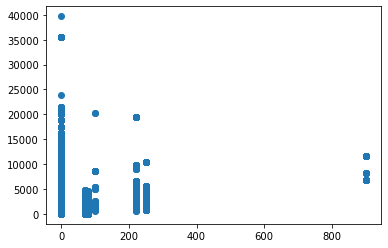

In [10]:
plt.scatter(buy_data["shipping_fee"], buy_data["revenue"])

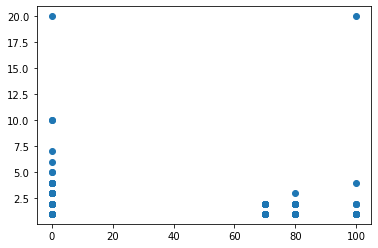

In [13]:
plt.scatter(buy_data["shipping_fee"], buy_data["amount"])

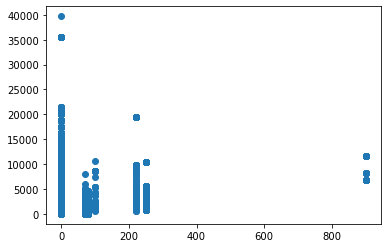

In [12]:
plt.scatter(buy_data["shipping_fee"], buy_data["average buy"])

In [122]:
shippping_fee_.columns

Index(['amount', 'revenue', 'shipping_fee', 'average_amount', 'total_amount',
       'buy_T', 'average_shipping_fee', 'atc_T', 'count_view', 'count_click',
       'count_pageview', 'count_love', 'device_computer', 'device_phone',
       'device_tablet', 'platform_android', 'platform_ios', 'platform_mweb',
       'platform_web', 'category'],
      dtype='object')

In [118]:
shippping_fee_ = classify_data[classify_data.shipping_fee != 0]

In [125]:
cate_shipping = shippping_fee_.groupby("category").shipping_fee.aggregate(["mean","std"])

In [ ]:
shippping_fee_

In [152]:
personal_shipping = personal_data[personal_data["shipping_fee"] != 0]

In [155]:
cate_shipping

mean        std
category                       
0         101.620594  87.091299
1          91.363636  49.298104
2         116.372549  73.616470
3          73.396226   8.975050

In [153]:
personal_shipping["shipping_fee"].mean()

71.11111111111111

In [154]:
personal_shipping["shipping_fee"].std()

3.3333333333333326